In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

In [ ]:
path = "gdrive/MyDrive/skripsi revisi/"
os.listdir(path)

['PPKM cleaning.csv',
 'Kebijakan PPKM cleaning.csv',
 'PPKM lengkap.csv',
 'Kepanjangan PPKM cleaning.csv',
 'PPKM.csv',
 'PPKM lengkap fix.csv',
 'Kepanjangan PPKM1.csv',
 'PPKM c.csv',
 'PPKM1.csv',
 'Kebijakan PPKM1.csv',
 'Kebijakan PPKM2.csv',
 'fix PPKM1.csv',
 'cleaning1.csv',
 'PPKM1 cleaning.csv',
 'PPKM1 cleaning edit.csv',
 'token1.csv',
 'token2.csv',
 'preprocessing lengkap.csv',
 'fix PPKM1.gsheet',
 'fix PPKM1 editt.csv',
 'clean r.csv',
 'PPKM fixxx.csv',
 'sentimen.csv',
 'contoh sentimen.csv']

In [ ]:
import pandas as pd
data = pd.read_csv(path+'clean r.csv')
data.head()

,text
0,Naik lagi ke level 2
1,Pls bgt ini pemerenta kudu ppkm /psbb lagi lah...
2,Nahh tuh tau. Sebelum PPKM level 3 menjemput
3,Kabarnya ga boleh cuti libur tahun baru
4,Tetep ga setujuuuu....covid gimana?? Ujung2n...


In [ ]:
data.shape 

(28392, 1)

In [ ]:
print("Number off null in text:{}".format(data['text'].isnull().sum()))

Number off null in text:0


In [ ]:
data = data.dropna()

In [ ]:
data['text'] = [entry.lower() for entry in data['text']]
data['text'].head()

0                                 naik lagi ke level 2
1    pls bgt ini pemerenta kudu ppkm /psbb lagi lah...
2         nahh tuh tau. sebelum ppkm level 3 menjemput
3    kabarnya ga boleh cuti libur tahun baru          
4      tetep ga setujuuuu....covid gimana?? ujung2n...
Name: text, dtype: object

In [ ]:
import string
string.punctuation

#Remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['text'] = data['text'].apply(lambda x: remove_punct(x))
data['text'].head()   

0                                 naik lagi ke level 2
1    pls bgt ini pemerenta kudu ppkm psbb lagi lah ...
2          nahh tuh tau sebelum ppkm level 3 menjemput
3    kabarnya ga boleh cuti libur tahun baru          
4      tetep ga setujuuuucovid gimana ujung2nya mun...
Name: text, dtype: object

In [ ]:
#remove angka
data['text']=data['text'].str.replace(r'[\d+]', '')
data['text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0                                      naik lagi ke level 
1        pls bgt ini pemerenta kudu ppkm psbb lagi lah ...
2               nahh tuh tau sebelum ppkm level  menjemput
3        kabarnya ga boleh cuti libur tahun baru          
4          tetep ga setujuuuucovid gimana ujungnya munc...
                               ...                        
28387    pemberlakuan pembatasan kegiatan masyarakat al...
28388     pemerintah mengatur kembali pemberlakuan pemb...
28389     ppkmubpemberlakuan pembatasan kegiatan masyar...
28390                                                 lagi
28391    jadi istilahnya pemberlakuan pembatasan kegiat...
Name: text, Length: 28392, dtype: object

In [ ]:
#link https://github.com/har07/PySastrawi
!pip install Sastrawi

In [ ]:
#stopword sastrawi di link  'https://devtrik.com/python/stopword-removal-bahasa-indonesia-python-sastrawi/'
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword =  factory.get_stop_words()
 
# Kalimat
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
data['text'].head()

0                                           naik level
1    pls bgt pemerenta kudu ppkm psbb lah desember ...
2                    nahh tuh tau ppkm level menjemput
3                    kabarnya ga cuti libur tahun baru
4    tetep ga setujuuuucovid gimana ujungnya muncul...
Name: text, dtype: object

In [ ]:
import requests
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

In [ ]:
stopwords()

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Import Stopword Factory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#Create factory
factory = StopWordRemoverFactory()
more_stopword = ['pls', 'bgt', 'nahh', 'tuh','iya','erti','york','yasudah','yefedu','yoi','yongcry','yorr','yu','ace','adhityasandi','adro','aali','aan','aces','acu','acung','adhi','adhima','ssma ',' breadtalkindo','yudha','yudhakhel','yudhamology','yuwono',
                'zinc','zipmexarticle','zonk','ora','or','aamiin','nya','kali','sih','yg','tidaknya','mah','lah','kok','yah','bah','bro','sis','sist','dong','tuh','oh','begitu'
                ,'pas','gak','dongs','hehe','haha','hihi','dih','duh','wah','ya','yah','eh','deh','dah','wkwk','wow','si','guys','gaes','mba','mbak','mas','afl','xi','wowjepang'
                ,'bang','kak','mah','yuk','bet','loh','woy','doang','tuh','euy','doi','yuhu','ada','aku','gw','gue','gua','elu','lu','kamu','yang','kalau','agam','xl'
                ,'jos','abai','abdul','jokowi','abdullah','ac','kita','gitu','aja','saja','abang','ah','ih','hey','hai','pubg','jt','om','nana','najwa','keke','yak','yan'
                ,'ih','woi','ew','zoe','lur','da','year','aa','yuk','achmad' ,'pakde','uwu','tos','po','jokowi','raffi', 'ahmad','yoga','yangs','yaa','yaelah','yam', 'kayak','crying','face']
stopwordplus = factory.get_stop_words()+stopwords()+more_stopword

data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwordplus))
data['text']

0                                                    level
1        pemerenta kudu ppkm psbb desember sd januari m...
2                                 tau ppkm level menjemput
3                                   kabarnya ga cuti libur
4        tetep ga setujuuuucovid gimana ujungnya muncul...
                               ...                        
28387    pemberlakuan pembatasan kegiatan masyarakat al...
28388    pemerintah mengatur pemberlakuan pembatasan ke...
28389    ppkmubpemberlakuan pembatasan kegiatan masyara...
28390                                                     
28391    istilahnya pemberlakuan pembatasan kegiatan ma...
Name: text, Length: 28392, dtype: object

In [ ]:
stopwordplus

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [ ]:
import re
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens
def convertToString(term):
  if type(term) is str:
    return term
  else:
    return str(term)
data['text'] = data['text'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 
data.head()

,text
0,[level]
1,"[pemerenta, kudu, ppkm, psbb, desember, sd, ja..."
2,"[tau, ppkm, level, menjemput]"
3,"[kabarnya, ga, cuti, libur]"
4,"[tetep, ga, setujuuuucovid, gimana, ujungnya, ..."


In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process
def kata_stem(teks):
    stem_teks = " ".join([stemmer.stem(i) for i in teks])
    return stem_teks
data['text'] = data['text'].apply(lambda x: kata_stem(x))
data['text'].head()

0                                                level
1    renta kudu ppkm psbb desember sd januari mingg...
2                                tau ppkm level jemput
3                                  kabar ga cuti libur
4    tetep ga setujuuuucovid gimana ujung muncul kl...
Name: text, dtype: object

In [ ]:
import re
# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['text'] = data['text'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 
data.head()

,text
0,[level]
1,"[renta, kudu, ppkm, psbb, desember, sd, januar..."
2,"[tau, ppkm, level, jemput]"
3,"[kabar, ga, cuti, libur]"
4,"[tetep, ga, setujuuuucovid, gimana, ujung, mun..."


In [ ]:
#simpan dalam bentuk csv
#data.to_csv(path+"PPKM fixxx.csv")

In [ ]:
import pandas as pd
data = pd.read_csv("PPKM fixxx.csv", sep=';')
data.head()

,Unnamed: 0,text
0,0,['level']
1,1,"['renta', 'kudu', 'ppkm', , 'desember', 'sd', ..."
2,2,"['tau', 'ppkm', 'level', 'jemput']"
3,3,"['kabar', 'tidak', 'cuti', 'libur']"
4,4,"['tetep', 'tidak', 'setuju', 'covid', 'gimana'..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word', stop_words=stopwordplus)
countvec = count_vectorizer.fit_transform(data.text).toarray()
countvec

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'breadtalkindo', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'ssma', 'tama'] not in stop_words.
  % sorted(inconsistent)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
countvec2 = pd.DataFrame(countvec)
countvec2

,0,1,2,3,4,5,6,7,8,9,...,19515,19516,19517,19518,19519,19520,19521,19522,19523,19524
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
kata_kata = count_vectorizer.get_feature_names()
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abad,abadi,abalabal,abdi,abdimas,abesss,abhi,abi,abidin,abiiis,...,zig,zink,zionis,zombie,zona,zonasi,zone,zoo,zoom,zoommeeting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menghitung TF-IDF 

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transformer.fit_transform(countvec)
tfidf

<28375x19525 sparse matrix of type '<class 'numpy.float64'>'
	with 200347 stored elements in Compressed Sparse Row format>

In [ ]:
# Mengubah menjadi array
tfidf1 = tfidf.toarray()
tfidf1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

,0,1,2,3,4,5,6,7,8,9,...,19515,19516,19517,19518,19519,19520,19521,19522,19523,19524
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kata_kata2 = count_vectorizer.get_feature_names()
df1 = pd.DataFrame(tfidf1, columns=kata_kata2)
df1
#kalau mau disave
#df1.to_csv("df1.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abad,abadi,abalabal,abdi,abdimas,abesss,abhi,abi,abidin,abiiis,...,zig,zink,zionis,zombie,zona,zonasi,zone,zoo,zoom,zoommeeting
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#3.1 Read file as panda dataframe
df = pd.read_csv(path+"PPKM fixxx.csv", sep=';') #create data frame

text = df['text']
text_list = []
for i in range(len(text)) :
    bbb = text[i].replace('[', '')
    bbb = bbb.replace(']', '')
    bbb = bbb.replace("'", "")
    bbb = bbb.replace(",", "")
    temp = []
    for j in bbb.split() :
        temp.append(j)
    text_list.append(temp)

In [ ]:
print(len(text_list))

28375


In [ ]:
df.head()

,Unnamed: 0,text
0,0,['level']
1,1,"['renta', 'kudu', 'ppkm', , 'desember', 'sd', ..."
2,2,"['tau', 'ppkm', 'level', 'jemput']"
3,3,"['kabar', 'tidak', 'cuti', 'libur']"
4,4,"['tetep', 'tidak', 'setujuuuucovid', 'gimana',..."


In [ ]:
print(text_list)

[['level'], ['renta', 'kudu', 'ppkm', 'desember', 'sd', 'januari', 'minggu', 'tajam', 'varian', 'omicron', 'tidak', 'kendali', 'libur', 'natal', 'taun', 'trus', 'tidak', 'kuliah', 'offline'], ['tau', 'ppkm', 'level', 'jemput'], ['kabar', 'tidak', 'cuti', 'libur'], ['tetep', 'tidak', 'setujuuuucovid', 'gimana', 'ujung', 'muncul', 'klaster'], ['panik', 'situ', 'panjang', 'ppkm', 'lagimasyarakat', 'bodo', 'santuy'], ['mmg', 'nga', 'surat', 'resmi', 'rezim', 'min', 'km', 'kmn', 'nga', 'updet', 'kudet', 'ppkm', 'jilid', 'ribu', 'buka', 'kmbl'], ['pilih', 'rumah', 'karna', 'ppkm', 'level'], ['wagub', 'dki', 'jakarta', 'riza', 'patria', 'pa', 'timbang', 'rencana', 'reuni', 'jakarta', 'pasuk', 'ppkm', 'level'], ['sedia', 'payung', 'hujan', 'lbh', 'cegah', 'drpd', 'colong', 'varian', 'omicron'], ['malioboro', 'ad'], ['jakarta', 'blm', 'bebas', 'pandemi', 'masuk', 'kategori', 'ppkm', 'level', 'kondisi', 'natal', 'n', 'turun', 'level', 'dki', 'picu', 'tambah', 'tambah', 'kerumun', 'skala', 'reuni

In [ ]:
pip install -U gensim 

In [ ]:
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [ ]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)

dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).

print(dictionary)

Dictionary(4646 unique tokens: ['level', 'desember', 'januari', 'kendali', 'kudu']...)


In [ ]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

28375
[(113, 1), (210, 1), (231, 1), (347, 1), (348, 1), (349, 1), (350, 1), (351, 1)]


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

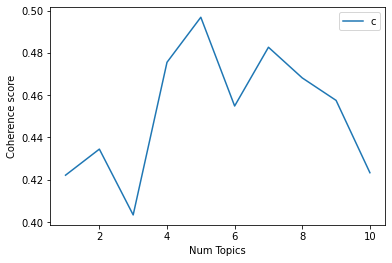

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.422071
Num Topics = 2  has Coherence Value of 0.434404
Num Topics = 3  has Coherence Value of 0.403269
Num Topics = 4  has Coherence Value of 0.475496
Num Topics = 5  has Coherence Value of 0.496818
Num Topics = 6  has Coherence Value of 0.454812
Num Topics = 7  has Coherence Value of 0.482622
Num Topics = 8  has Coherence Value of 0.468097
Num Topics = 9  has Coherence Value of 0.457468
Num Topics = 10  has Coherence Value of 0.423241


In [ ]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)
pprint(model.print_topics())

[(0,
  '0.028*"surat_edar" + 0.022*"darurat" + 0.015*"presiden_joko" + '
  '0.014*"level" + 0.014*"presiden" + 0.011*"surat" + 0.010*"edar" + '
  '0.009*"dukung" + 0.008*"tangan_pandemi" + 0.008*"turun"'),
 (1,
  '0.114*"giat_masyarakat" + 0.113*"laku_batas" + '
  '0.056*"laku_batas_giat_masyarakat" + 0.055*"batas" + 0.054*"giat" + '
  '0.051*"laku" + 0.049*"masyarakat" + 0.011*"batas_sosial" + '
  '0.009*"jawa_bali" + 0.008*"januari"'),
 (2,
  '0.022*"skala_mikro" + 0.016*"skala" + 0.016*"juli" + 0.014*"tangan_covid" + '
  '0.011*"covid" + 0.011*"tekan_sebar" + 0.007*"darurat_imbas" + '
  '0.007*"pakai_masker" + 0.006*"tidak" + 0.006*"sahabat"'),
 (3,
  '0.017*"mikro" + 0.012*"terap" + 0.011*"perintah" + 0.011*"batas_giat" + '
  '0.009*"bas_mikro" + 0.009*"protokol_sehat" + 0.009*"sebar_covid" + '
  '0.009*"masyarakat" + 0.009*"darurat" + 0.009*"laksana"'),
 (4,
  '0.020*"panjang" + 0.017*"kendali_sebar" + 0.013*"perintah_pusat" + '
  '0.009*"tanggal_sd" + 0.009*"jawabali" + 0.009*"so

In [ ]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.024*"mikro" + 0.016*"bas_mikro" + 0.014*"perintah_pusat" + 0.011*"level" + 0.011*"senin" + 0.010*"sobat" + 0.009*"negeri_nomor" + 0.008*"terap" + 0.008*"pusat" + 0.008*"instruksi_menteri"
Topic: 1 Word: 0.022*"surat_edar" + 0.015*"kendali_sebar" + 0.014*"cegah_sebar" + 0.011*"pulau_jawa" + 0.009*"surat" + 0.009*"corona_virus" + 0.008*"edar" + 0.007*"jakarta" + 0.007*"kota_bekas" + 0.006*"resmi_panjang"
Topic: 2 Word: 0.017*"skala_mikro" + 0.010*"skala" + 0.010*"protokol_sehat" + 0.009*"laksana" + 0.009*"mikro" + 0.007*"lockdown" + 0.007*"masyarakat" + 0.007*"sehat" + 0.006*"protokol" + 0.006*"tanggal_sd"
Topic: 3 Word: 0.023*"jawa_bali" + 0.022*"panjang" + 0.013*"covid" + 0.012*"jawa" + 0.012*"tangan_covid" + 0.012*"sebar_covid" + 0.012*"istilah" + 0.010*"bali" + 0.010*"tular_covid" + 0.009*"tekan_sebar"
Topic: 4 Word: 0.116*"giat_masyarakat" + 0.115*"laku_batas" + 0.057*"laku_batas_giat_masyarakat" + 0.057*"batas" + 0.056*"giat" + 0.055*"laku" + 0.051*"masyarakat" + 0

In [ ]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)])

#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [ ]:
!pip install -q pyLDAvis

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.323265 -0.057136       1        1  23.012643
1      0.075400  0.150794       2        1  20.586764
2      0.058417 -0.098096       3        1  20.221595
3      0.032633  0.199748       4        1  19.655077
0      0.156816 -0.195310       5        1  16.523921, topic_info=                           Term         Freq        Total Category  logprob  \
372             giat_masyarakat  1563.000000  1563.000000  Default  30.0000   
375                  laku_batas  1548.000000  1548.000000  Default  29.0000   
376  laku_batas_giat_masyarakat   767.000000   767.000000  Default  28.0000   
99                         giat   817.000000   817.000000  Default  27.0000   
369                       batas   823.000000   823.000000  Default  26.0000   
..                          ...          ...          ...      ...      ...   
264                      r

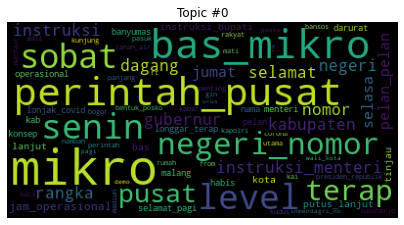

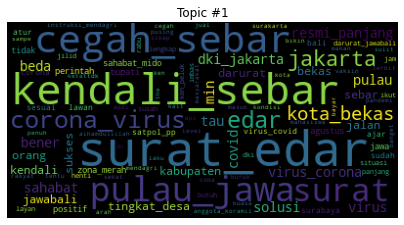

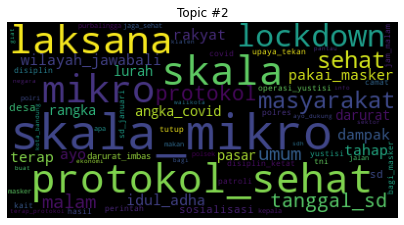

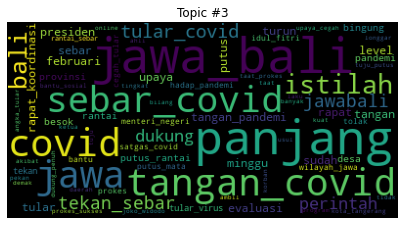

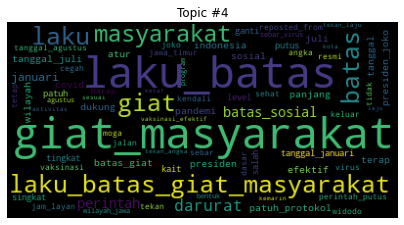

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, min_font_size=6).fit_words(dict(model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("wcld-topic-#"+str(t)+".png", facecolor='k', bbox_inches='tight')

plt.show()

In [ ]:
pip install pyldavis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)
